In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import DataA


# Moon Data and First Power Spectra

In [2]:
D = np.load("big_moonfinal.npz")["volts"]
T = np.load("big_moonfinal.npz")["time"]

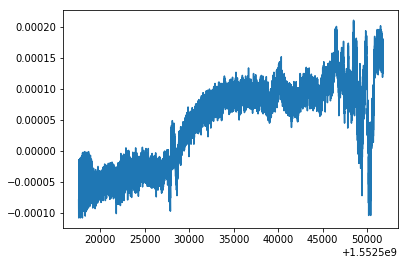

In [3]:
plt.plot(T,D)
plt.show()

In [4]:
Sig = np.fft.fft(D)
n = len(D)
timestep = 1 #second
freq = np.fft.fftfreq(n, d=timestep)


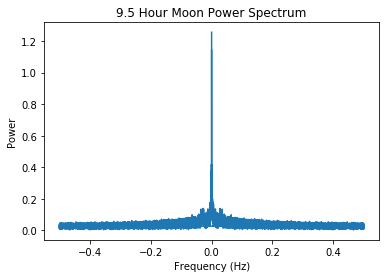

In [5]:
plt.title('9.5 Hour Moon Power Spectrum')
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.plot(freq,abs(Sig)**0.5)
plt.savefig('PowerSpec.pdf')

In [6]:
V_spec = np.fft.fft(D)
P_moon = abs(V_spec)**2
sampling_freq = 1 #Hz
f = np.fft.fftfreq(len(D),1/sampling_freq)


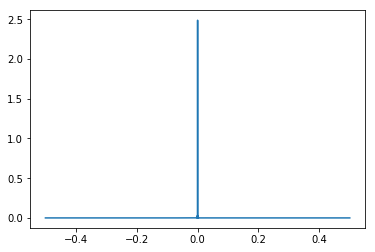

In [7]:
#%matplotlib notebook
plt.plot(np.fft.fftshift(f),np.fft.fftshift(P_moon))

In [8]:
V_filtered = V_spec
for i in range (0,len(P_moon)):
    if (f[i]>-0.04) and (f[i]<-0.02):
        V_filtered[i] = V_spec[i]
    if (f[i]<0.04) and (f[i]>0.02):
        V_filtered[i] = V_spec[i]
    else:
        V_filtered[i] = 0

/Users/costassoler/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


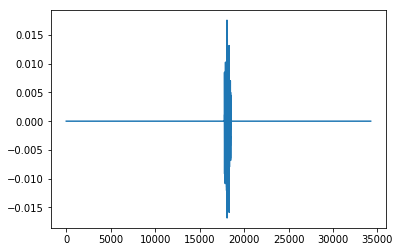

In [9]:
plt.plot(np.fft.fftshift(V_spec))

In [11]:
v_filtered = np.fft.ifft(V_spec)

/Users/costassoler/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


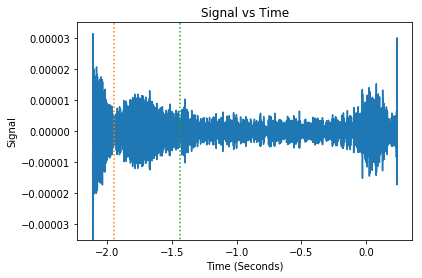

In [23]:
hs_moon = np.load('HsMoon.npz')['data']
plt.plot(hs_moon,v_filtered)
plt.title('Signal vs Time')
plt.xlabel('Time (Seconds)')
plt.ylabel('Signal')
plt.plot([-1.95,-1.95],[-10,10],':')
plt.plot([-1.44,-1.44],[-10,10],':')
plt.ylim(-0.000035,0.000035)
plt.savefig('SigVsTime.pdf')
plt.show()

# 10 Calculating width of moon

In [313]:
y1 = 2400 #times at which the "bessel function" goes to zero
y2 = 9400
Y = [y1,y2]

hi = 15*3600



h1 = -1.95
h2 = -1.44

xdata = [h1,h2]
ydata = [y1,y2]

def func(x, R):
    B = 20
    lam = (3*10**8)/(10.7*10**9)
    
    return (B/lam)*np.cos(x)/R


In [314]:
j_roots = [3.83,7.83]#[10.17,13.32]

 #these are the hour angles of the moon at the null locations in radians
def u(ha):
    B = 15
    lam = (3*10**8)/(10.7*10**9)
    u = np.cos(ha)*B/lam
    return u

In [315]:
U_vals = [u(h1),u(h2)]


In [316]:
LS = np.polyfit(U_vals,j_roots,1)

In [317]:
R = LS[0]/(2*np.pi)
print("Agular diameter of Moon: ", R*2*180/np.pi,"Degrees")

Agular diameter of Moon:  0.2723856255185544 Degrees


# Moon Diameter Error

In [331]:
sigU1 = np.sin(h1)*0.2*B/lam
sigU2 = np.sin(h2)*0.2*B/lam

R1 = (3.83/(2*np.pi))/u(h1)
R2 = (7.83/(2*np.pi))/u(h2)
#R*2*180/np.pi
sigR1 = R1*sigU1/u(Ha1)
sigR2 = R2*sigU2/u(Ha2)
sigRFinal = R*(.25*sigR1**2+.25*sigR2**2)**.5
sigRFinal*180/np.pi
print("Error on Moon Diameter Measurement: ",2*sigRFinal*180/np.pi,"degrees")

Error on Moon Diameter Measurement:  0.013064571874306425 degrees


# Long Sun Diameter:

In [320]:
VBS = np.load('Sun2019final.npz')['volts']
TBS = np.load('Sun2019final.npz')['time']

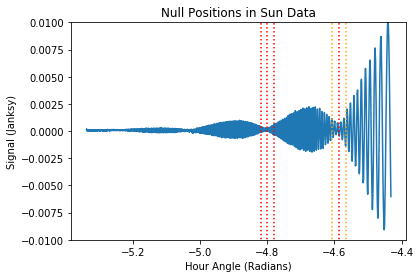

In [321]:
TBS = np.load('Hs.npz')['data']
#%matplotlib notebook
plt.title('Null Positions in Sun Data')
plt.plot(TBS[len(VBS)//2:len(VBS)]-TBS[0],VBS[len(VBS)//2:len(VBS)])
plt.ylabel('Signal (Janksy)')
plt.xlabel('Hour Angle (Radians)')
plt.plot([-4.587,-4.587],[-10,10],':',color='red')
plt.plot([-4.607,-4.607],[-10,10],':',color='orange')
plt.plot([-4.567,-4.567],[-10,10],':',color='orange')


plt.plot([-4.80,-4.80],[-10,10],':',color='red')
plt.plot([-4.82,-4.82],[-10,10],':',color='red')
plt.plot([-4.780,-4.780],[-10,10],':',color='red')

plt.ylim(-0.01,0.01)
plt.savefig('NullSun.pdf')

plt.show()
HA1 = 23340.9

In [322]:
Ha1 = -4.587
Ha2 = -4.80
Ha3 = -5.037
Uvals = [u(Ha1),u(Ha2)]
j_roots = [3.83,7.83]#[10.17,13.32] 
B =15
print(U_vals)

[-198.04674477293847, 69.77668417490787]


In [323]:
LS = np.polyfit(Uvals,j_roots,1)
R = LS[0]/(2*np.pi)
print("Agular diameter of Sun: ", R*2*180/np.pi,"Degrees")
'''
This works pretty well if I exclude the 3rd null. Not sure why'''

Agular diameter of Sun:  0.6415021806114024 Degrees


'\nThis works pretty well if I exclude the 3rd null. Not sure why'

# Sun Diameter Error

In [330]:
sigU1 = np.sin(Ha1)*0.2*B/lam
sigU2 = np.sin(Ha2)*0.2*B/lam

R1 = (3.83/(2*np.pi))/u(Ha1)
R2 = (7.83/(2*np.pi))/u(Ha2)
#R*2*180/np.pi
sigR1 = R1*sigU1/u(Ha1)
sigR2 = R2*sigU2/u(Ha2)
sigRFinal = R*(.25*sigR1**2+.25*sigR2**2)**.5
sigRFinal*180/np.pi
print("Error on Sun Diameter Measurement: ",2*sigRFinal*180/np.pi,"degrees")

Error on Sun Diameter Measurement:  0.01998768224202069 degrees


# Bessel Function (compare Sun roots to J1/x roots)

In [45]:
j_roots = [3.83,7.83]#[10.17,13.32]

 #these are the hour angles of the moon at the null locations in radians
def u(ha):
    B = 20
    lam = (3*10**8)/(10.7*10**9)
    u = np.cos(ha)*B/lam
    return u
HA1 = (18.5-16.5)*np.pi/12
HA2 = (18.5-18.25)*np.pi/12
U_vals = [u(HA1),u(HA2)]
LS = np.polyfit(U_vals,j_roots,1)
R = LS[0]/(2*np.pi)
print("Agular diameter of Moon: ", R*2*180/np.pi,"Degrees")


Agular diameter of Moon:  0.7757367854221777 Degrees


In [46]:
Sig = np.fft.fft(VBS)
n = len(VBS)
timestep = 1 #second
freq = np.fft.fftfreq(n, d=timestep)


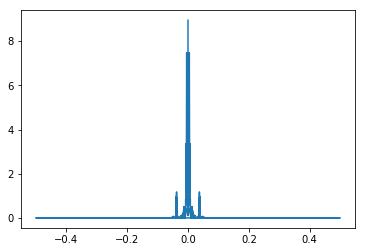

In [47]:
#%matplotlib notebook

plt.plot(freq,abs(Sig)**2)

In [48]:
Bound = [[-0.04,-0.034],[0.034,0.04]]
FILTERED = DataA.Filter(freq,abs(Sig)**2,Bound)


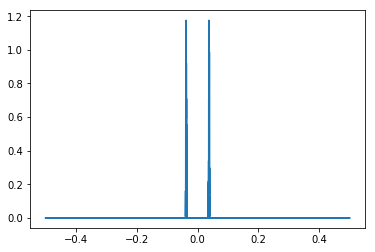

In [49]:
plt.plot(freq,FILTERED)

/Users/costassoler/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


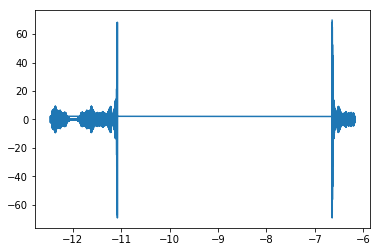

In [50]:
Sig_Filtered = np.fft.fft(FILTERED)
#Time = np.fft.fftfreq(freq)
T = TBS-TBS[0]

plt.plot(TBS,Sig_Filtered)

# HANDOUT ATTEMPT (BASELINE):

In [238]:
N = 1000
M = 100
A = np.empty((N,M), dtype=object)
Res = np.empty((N,M))
var = np.empty((N,M), dtype=object)
ewVals = np.linspace(1,20,N)
nsVals = np.linspace(0,5,M)
Vars = np.empty((N,M),dtype=object)
Y = VBS[0:100]
Y.shape = (-1,1)
VBS = np.load('Sun2019final.npz')['volts']
hs = np.load('Hs.npz')['data'][0:100]
d = 0 #GUESS for sun
L = 37.87*np.pi/180
Offset = np.zeros((len(hs)))+1
for i in range (0,len(ewVals)):
    for j in range(0,len(nsVals)):
        Bew = ewVals[i]
        Bns = nsVals[j]
        lam = (3*10**8)/(10.7*10**9)
        Qew = Bew*np.cos(d)/lam
        Qns = Bns*np.sin(L)*np.cos(d)
        vT = Qew*np.sin(hs)+Qns*np.cos(hs)
        ATerm = np.cos(2*np.pi*vT)
        BTerm = np.sin(2*np.pi*vT)
        
        XT = np.vstack((ATerm,BTerm)) #gives you (Aterm1,Bterm1)RETURN(Aterm2,Bterm2) etc
        X = XT.T
        XX = np.dot(XT,X)
        XY = np.dot(XT,Y)
        XXI = np.linalg.inv(XX)
        a = np.dot(XXI,XY)
        A[i,j] = a

        YBAR = np.dot(X,a)
        DELY = Y-YBAR
        s_sq = np.dot(DELY.T, DELY)/(len(Y)-1)
        #s_sq = np.sum(abs(DELY)**2)#/(len(Y)-1)
        Res[i,j] = s_sq
        
        
        

In [239]:
Q = np.where(Res==Res.min())
print('Bew = ',ewVals[Q[0][0]])
print('Bns = ',nsVals[Q[1][0]])


Bew =  14.845845845845847
Bns =  0.9090909090909091


In [240]:
AConst = A[Q[0][0],Q[1][0]][0][0]
BConst=A[Q[0][0],Q[1][0]][1][0]

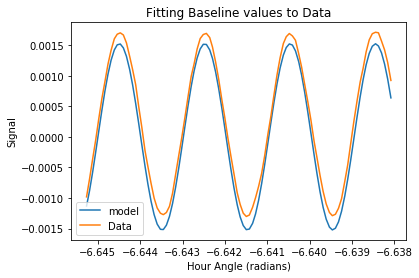

In [241]:
Bew =  ewVals[Q[0][0]]
Bns =  nsVals[Q[1][0]]

Qew = Bew*np.cos(d)/lam
Qns = Bns*np.sin(L)*np.cos(d)
vT = Qew*np.sin(hs)+Qns*np.cos(hs)
F = AConst*np.cos(2*np.pi*vT)+BConst*np.sin(2*np.pi*vT)
plt.title('Fitting Baseline values to Data')
plt.plot(hs[0:100],F,label = 'model')
plt.plot(hs[0:100],VBS[0:100],label = 'Data')
plt.xlabel('Hour Angle (radians)')
plt.ylabel('Signal')
plt.legend()
plt.savefig('BaselinesVsData.pdf')

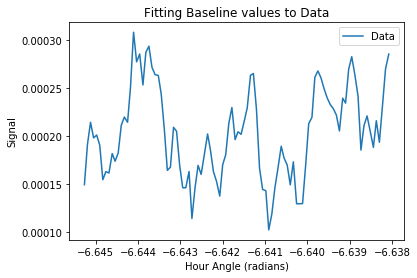

In [242]:
Bew =  ewVals[Q[0][0]]
Bns =  nsVals[Q[1][0]]

Qew = Bew*np.cos(d)/lam
Qns = Bns*np.sin(L)*np.cos(d)
vT = Qew*np.sin(hs)+Qns*np.cos(hs)
F = AConst*np.cos(2*np.pi*vT)+BConst*np.sin(2*np.pi*vT)
plt.title('Fitting Baseline values to Data')
plt.plot(hs[0:100],VBS[0:100]-F,label = 'Data')
plt.xlabel('Hour Angle (radians)')
plt.ylabel('Signal')
plt.legend()
plt.savefig('BaselinesVsData.pdf')

In [243]:
#SIGMA:
Noise = VBS[0:100]-F
SIGMA = np.sort(Noise)[68]
SIGMA


0.0002277537285086279

# Baseline ERROR a la Aaron

In [244]:
## Calculate Sigma for Data:


In [245]:
#MAKE SURE YOU RUN THE A and B CALCULATOR FIRST!!! :D #
#N = 1000
#M = 100
#A = np.empty((N,M), dtype=object)
#Res = np.empty((N,M))
#var = np.empty((N,M), dtype=object)
#ewVals = np.linspace(1,20,N)
#nsVals = np.linspace(0,5,M)
#Vars = np.empty((N,M),dtype=object)
#Y = VBS[0:100]
#Y.shape = (-1,1)
#VBS = np.load('Sun2019final.npz')['volts']
#hs = np.load('Hs.npz')['data'][0:100]
#d = 0 #GUESS for sun
#L = 37.87*np.pi/180
CHI_sq = np.empty((len(ewVals),len(nsVals)))
for i in range (0,len(ewVals)):
    for j in range(0,len(nsVals)):   
        CHI_sq[i,j] = Res[i,j]/SIGMA**2
        
        

In [262]:
CHI_sq[737,0]

0.9744599526426112

In [263]:
nsVals[49]-nsVals[18]

1.5656565656565657

In [232]:
AConst = A[Q[0][0],Q[1][0]][0][0]
BConst=A[Q[0][0],Q[1][0]][1][0]
Bew = ewVals[i]
BNs = 0.91
lam = (3*10**8)/(10.7*10**9)
Qew = Bew*np.cos(d)/lam
Qns = BNs*np.sin(L)*np.cos(d)
vT = Qew*np.sin(hs)+Qns*np.cos(hs)
ATerm = np.cos(2*np.pi*vT)
BTerm = np.sin(2*np.pi*vT)
        
vT = Qew*np.sin(hs)+Qns*np.cos(hs)
F = AConst*np.cos(2*np.pi*vT)+BConst*np.sin(2*np.pi*vT)

CHI_sq = np.sum((VBS[0:100]-F)**2)/(100*SIGMA**2)
CHI_sq

41.335993144413756

# HANDOUT ATTEMPT (DECLINATION):

In [487]:
Bew =  14.902902902902904
Bns =  -7.957957957957958
N = 1000
A = np.empty((N), dtype=object)
Res = np.empty((N))
var = np.empty((N), dtype=object)
DecVals = np.linspace(-10*np.pi/180,10*np.pi/180,N)
Vars = np.empty((N,M),dtype=object)
Y = VBS
Y.shape = (-1,1)
VBS = np.load('Sun2019final.npz')['volts']
hs = np.load('Hs.npz')['data']
d = 0 #GUESS for sun
L = 37.87*np.pi/180

for i in range (0,len(DecVals)):
    #Bew = 20
    #Bns = 0 These are calculated in the above cells
    lam = (3*10**8)/(10.7*10**9)
    
    Qew = Bew*np.cos(DecVals[i])/lam
        
    Qns = Bns*np.sin(L)*np.cos(DecVals[i])
    vT = Qew*np.sin(hs)+Qns*np.cos(hs)
    ATerm = np.cos(2*np.pi*vT)
    BTerm = np.sin(2*np.pi*vT)
    
    XT = np.vstack((ATerm,BTerm)) #gives you (Aterm1,Bterm1)RETURN(Aterm2,Bterm2) etc
    X = XT.T
    XX = np.dot(XT,X)
    XY = np.dot(XT,Y)
    XXI = np.linalg.inv(XX)
    a = np.dot(XXI,XY)
    A[i] = a

    YBAR = np.dot(X,a)
    DELY = Y-YBAR
    s_sq = np.dot(DELY.T, DELY)/(len(Y)-2)
    Res[i] = s_sq
        
        
        

In [488]:
Q = np.where(Res==Res.min())
#print('Bew = ',ewVals[Q[0][0]])
#print('Bns = ',nsVals[Q[1][0]])


In [489]:
print('dec = ',DecVals[Q[0]][0]*180/np.pi,'degrees')
Q[0]

dec =  -3.4334334334334335 degrees


array([328, 671])

# Declination ERROR a la Aaron

<IPython.core.display.Javascript object>


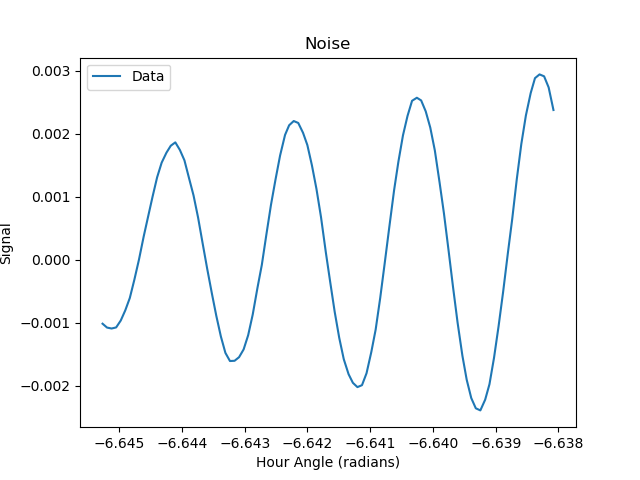

In [524]:
Bew =  15.886#ewVals[Q[0][0]]
#Bns =  nsVals[Q[1][0]]
d = DecVals[Q[0]][0]
Qew = Bew*np.cos(d)/lam
Qns = Bns*np.sin(L)*np.cos(d)
vT = Qew*np.sin(hs[0:100])+Qns*np.cos(hs[0:100])
F = AConst*np.cos(2*np.pi*vT)+BConst*np.sin(2*np.pi*vT)
plt.title('Noise')
plt.plot(hs[0:100],VBS[0:100]-F,label = 'Data')
plt.xlabel('Hour Angle (radians)')
plt.ylabel('Signal')
plt.legend()
plt.savefig('BaselinesVsData.pdf')

In [519]:
#SIGMA:
Noise = VBS[0:100]-F
SIGMA = np.sort(Noise)[68]
SIGMA


0.001427094122972341

In [525]:
#MAKE SURE YOU RUN THE A and B CALCULATOR FIRST!!! :D #
#N = 1000
#M = 100
#A = np.empty((N,M), dtype=object)
#Res = np.empty((N,M))
#var = np.empty((N,M), dtype=object)
#ewVals = np.linspace(1,20,N)
#nsVals = np.linspace(0,5,M)
#Vars = np.empty((N,M),dtype=object)
#Y = VBS[0:100]
#Y.shape = (-1,1)
#VBS = np.load('Sun2019final.npz')['volts']
#hs = np.load('Hs.npz')['data'][0:100]
#d = 0 #GUESS for sun
#L = 37.87*np.pi/180
CHI_sq = np.empty((len(DecVals)))
for i in range (0,len(DecVals)):
    CHI_sq[i] = Res[i]/SIGMA**2
        
        

In [528]:
CHI_sq[900]
DecVals[600]*180/np.pi

2.0120120120120117

# Handout NS,EW and DEC

In [366]:
N = 1000
M = 100
L = 100
A = np.empty((N,M,L), dtype=object)
Res = np.empty((N,M,L), dtype=object)
var = np.empty((N), dtype=object)
DecVals = np.linspace(0,5,L)
Vars = np.empty((N,M),dtype=object)
Y = VBS
Y.shape = (-1,1)
VBS = np.load('Sun2019final.npz')['volts']
hs = np.load('Hs.npz')['data']

L = 37.87*np.pi/180

for i in range (0,N):
    for j in range (0,M):
        for k in range (0,L):
            #Bew = 20
            #Bns = 0 These are calculated in the above cells
            lam = (3*10**8)/(10.7*10**9)
            Qew = Bew[i]*np.cos(DecVals[k]*np.pi/180)/lam
        
            Qns = Bns[j]*np.sin(L)*np.cos(DecVals[k]*np.pi/180)
            vT = Qew*np.sin(hs)+Qns*np.cos(hs)
            ATerm = np.cos(2*np.pi*vT)
            BTerm = np.sin(2*np.pi*vT)
    
            XT = np.vstack((ATerm,BTerm)) #gives you (Aterm1,Bterm1)RETURN(Aterm2,Bterm2) etc
            X = XT.T
            XX = np.dot(XT,X)
            XY = np.dot(XT,Y)
            XXI = np.linalg.inv(XX)
            a = np.dot(XXI,XY)
            A[i,j,k] = a

            YBAR = np.dot(X,a)
            DELY = Y-YBAR
            s_sq = np.dot(DELY.T, DELY)/(len(Y)-2)
            Res[i,j,k] = s_sq
            
        
        
        

TypeError: 'float' object cannot be interpreted as an integer

In [367]:
type(L)

float

dec =  -2.9929929929929937 degrees


# Errors:

In [249]:
D = 0
N = len(hs)
d = abs(VBS[i]-F)
D += sum(d**2)
dev = (D/N)**.5
Avg = np.mean(abs(F))
print(dev)
dev/Avg

0.0004056519329385443


0.4190206084907733

In [ ]:
Qew = ewVals[Q[0][0]]*np.cos(d)/lam
Qns = nsVals[Q[1][0]]*np.sin(L)*np.cos(d)
vT = Qew*np.sin(hs)+Qns*np.cos(hs)
ATerm = np.cos(2*np.pi*vT)
BTerm = np.sin(2*np.pi*vT)
F = A[Q[0][0],Q[1][0]][0]*ATerm+A[Q[0][0],Q[1][0]][1]*BTerm
DEVS = F-VBS
W = DEVS**2
np.sum(W)/(len(F))/np.mean(abs(F))

# Some Helpful Figures

<IPython.core.display.Javascript object>


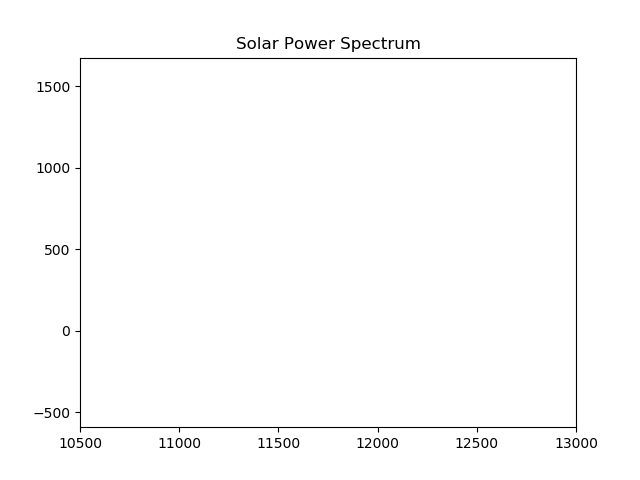

In [381]:
%matplotlib notebook
PsM17 = np.load('M17_final.npz')['volts']
TM17 = np.load('M17_final.npz')['times']
timestep = 1 #second
freq = np.fft.fftfreq(len(PsM17), d=timestep)
PSM17 = np.fft.fft(PsM17)
PowerSpecM17 = abs(PSM17)**2
plt.plot(freq,JyConversion*PowerSpecM17)
#plt.xlim(13300,13400)
plt.show()

In [378]:
### Calculate Janksy ###
w1 = 0.000475
w2 = 0.00139
inter = w2-w1
GoodFreqs = []
for i in range (0,len(PsM17)):
    if (freq[i]>w1) and (freq[i]<w2):
        GoodFreqs.append(PowerSpecM17[i])
    elif (freq[i]<-w1) and (freq[i]>-w2):
        GoodFreqs.append(PowerSpecM17[i])
Pavg = np.mean(GoodFreqs)
JyConversion = 300/Pavg
    

In [380]:
JyConversion

101176.05470749275

<IPython.core.display.Javascript object>


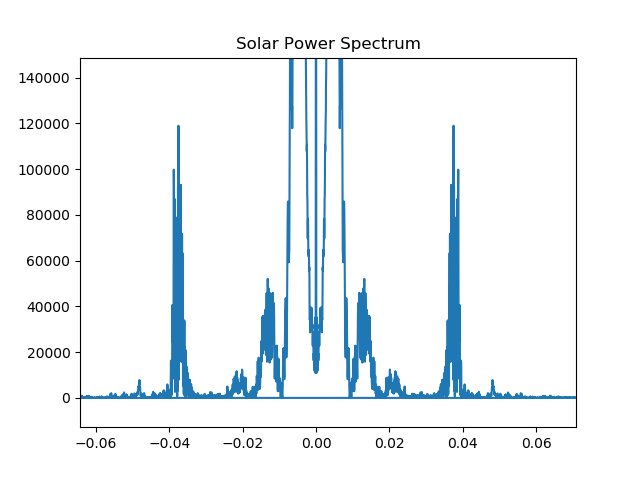

Text(0.5,1,'Solar Power Spectrum')

In [386]:
PS = np.fft.fft(VBS)
freqs = np.fft.fftfreq(len(PS),1)
plt.plot(freqs, JyConversion*abs(PS)**2)
plt.title('Solar Power Spectrum')
#plt.xlim(10500,13000)

<IPython.core.display.Javascript object>


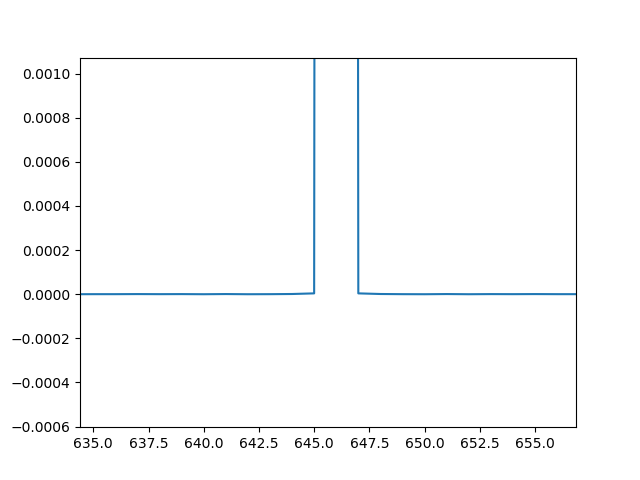

In [355]:
PsCrab = np.load('trialcrabfinal.npz')['volts']
PS = np.fft.fft(PsCrab)
plt.plot(np.fft.fftshift(abs(PS)**2))